## Bank Note Authentification

v.
*   Artificial Neural Network
*   Deep Learning



### Importing the libraries

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot 


In [26]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [27]:
df = pd.read_csv('BankNoteAuthentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
df.shape

(1372, 5)

In [29]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [30]:
df.describe() #  summary statistics

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


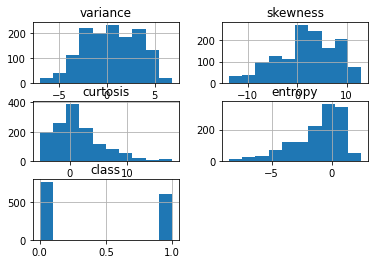

In [31]:
df.hist()      # plot histogram 
pyplot.show()

Histogram of Banknote classification dataset

- here histogram showing the first two variables have a Gaussian like distribution and next two may have a skewed Gaussian distribution or an exponential distribution. 

### Splitting the dataset into X and y

In [32]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [33]:
X = X.astype('float32')

In [34]:
print(X)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [35]:
y = y.reshape(len(y), 1)
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


### Splitting the dataset into the Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=0)

## Part 2 - Building the ANN

### Initializing the ANN

Determining the number of input features

In [37]:
n_features = X.shape[1]

In [38]:
ann = tf.keras.models.Sequential()


### Adding the input layer 

In [39]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

### Adding the output layer

In [40]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [41]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [42]:
from sklearn.utils import validation
history = ann.fit(X_train, y_train, batch_size=32, epochs=50, verbose=0, validation_data=(X_test, y_test))

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**new result**

Using our ANN model to predict if the bank note with the following informations is genuine or forged : 

variance: 3.62160

skewness: 8.6661

curtosis: -2.8073

entropy: -0.44699

class: 1 - Genuine (True), 0 - Forged (False) ?


**new result**

In [43]:
df.head(1)  # predicting first row (bank note) from dataset

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0


In [44]:
print(ann.predict([[ 3.6216, 8.6661, -2.8073, -0.44699]]) > 0.5)

[[False]]


Therefore, our ANN model predicts that this bank note is forged!


### Predicting the Test set results

In [45]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]

### Making the Confusion Matrix

[[252   3]
 [  1 202]]
Accuracy: 0.991


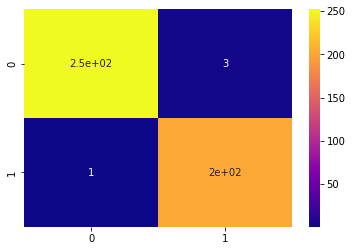

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='plasma')
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)

### Plot Learning Curves

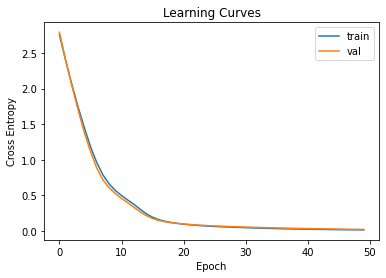

In [48]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
